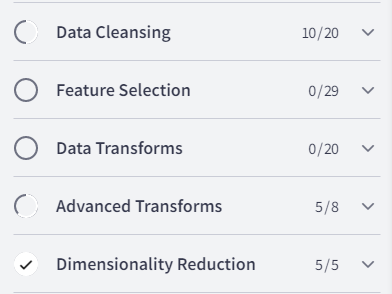

In [ ]:
# Adcanced Transforms
#
#
#
#

In [ ]:
# TOP of the transfomer_module : modify input cols, to make theme fit for inputing theme into models

In [ ]:
# 0) there are mainly 3 transformers: [imputer, scaler, encoder]
# 1) imputing the missing value spaces
    # a) imputing diff dtype cols like num and cat cols with diff imputations_methods like(mean, mode, median, nearby....etc)
# 2) scaling the num cols
# 3) encoding the cat cols
# 4) changing the order of these transformers using pipeline

# ColumnTransformer Usecase in abalone dataset

In [1]:
# loading dataset
from pandas import read_csv
dataframe = read_csv('abalone.csv', header=None)

In [2]:
# spliting dataset into x and y
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
print(X.shape, y.shape)

(4177, 8) (4177,)


In [3]:
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [4]:
# defining [scaler and transformer(cat->num)] == data_prepration in pipeline and passing to transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [5]:
# defining the model
from sklearn.svm import SVR
model = SVR(kernel='rbf',gamma='scale',C=100)

In [6]:
# define the data_preparation and data_modeling in a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])

In [7]:
# define the cross-validation configuration
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [11]:
# evaluate the pipeline using cross_validation and MAE
from sklearn.model_selection import cross_val_score
scores_of_folds = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)
display(scores_of_folds)

array([-1.47974776, -1.42901473, -1.48685772, -1.47235705, -1.44691296,
       -1.46920259, -1.47385832, -1.57545029, -1.38689572, -1.42815531])

In [9]:
# convert MAE scores to positive values
from numpy import absolute
scores_of_folds = absolute(scores_of_folds)

In [10]:
# summarize the model performance
from numpy import mean
from numpy import std
print('MAE: %.3f (%.3f)' % (mean(scores_of_folds), std(scores_of_folds)))

MAE: 1.465 (0.047)


# example of normalizing x and y variables for regression.

In [ ]:
# loading data
from numpy import loadtxt
dataset = loadtxt('housing.csv', delimiter=",")

In [ ]:
# spliting dataset into x and y
X, y = dataset[:, :-1], dataset[:, -1]

In [ ]:
# defining the pipeline with scaler and model
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])

In [ ]:
# defining the cross_val_scorer with a [CV, scorer(like:MAE) and model]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_of_folds = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# convert scores to positive
from numpy import absolute
scores_of_folds = absolute(scores_of_folds)

In [ ]:
# summarize the result
from numpy import mean
mean_of_folds = mean(scores_of_folds)
print('Mean MAE: %.3f' % (mean_of_folds))

# example of power_transforming x and y variables for regression.

In [ ]:
# loading data
from numpy import loadtxt
dataset = loadtxt('housing.csv', delimiter=",")

In [ ]:
# spliting dataset column_wise into x and y
X, y = dataset[:, :-1], dataset[:, -1]

In [ ]:
# defining pipeline with [sacler, transformer, and model]
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor()))
pipeline = Pipeline(steps=steps)

In [ ]:
# preparing the model with prepared_pipeline and transformer
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())

In [ ]:
# evaluating the cross_val_scorerer with [scorer(MAE), CV(repeatedKFold, and model)]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_of_folds = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# converting scores to positive
from numpy import absolute
scores_of_folds = absolute(scores_of_folds)

In [ ]:
# summarize the result
from numpy import mean
mean_of_folds = mean(scores_of_folds)
print('Mean MAE: %.3f' % (mean_of_folds))

# example of creating a test dataset and splitting it into train and test sets

In [ ]:
# preparing the dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
# spliting dataset into x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# summarize the scale of each input variable???????????
for i in range(X_test.shape[1]):
    print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' %
            (i, X_train[:, i].min(), X_train[:, i].max(),
                X_test[:, i].min(), X_test[:, i].max()
            )
         )

# example of scaling the dataset

In [ ]:
# preparing the dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
# spliting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# defining scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# fitting scaler on the training dataset
scaler.fit(X_train)

In [ ]:
# transforming both datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# summarize the scale of each input variable?????
for i in range(X_test.shape[1]):
    print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' %
        (i, X_train_scaled[:, i].min(), X_train_scaled[:, i].max(),
            X_test_scaled[:, i].min(), X_test_scaled[:, i].max()))

# example of fitting a model on the scaled dataset

In [ ]:
# preparing dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
# splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# defining scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# fitting scaler on the training dataset
scaler.fit(X_train)

In [ ]:
# transform the training dataset
X_train_scaled = scaler.transform(X_train)

In [ ]:
# defining model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)

In [ ]:
# saving the model
from pickle import dump
dump(model, open('model.pkl', 'wb'))

In [ ]:
# saving the scaler
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

# load model and scaler to make predictions on new data

In [ ]:
# preparing dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

In [ ]:
# splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# load the model
from pickle import load
model = load(open('model.pkl', 'rb'))

# load the scaler
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

In [ ]:
# check the scale of the test_set before Re-scaling
print('Raw test set range')
for i in range(X_test.shape[1]):
    print('>%d, min=%.3f, max=%.3f' % (i, X_test[:, i].min(), X_test[:, i].max()))

In [ ]:
# transforming the test dataset
X_test_scaled = scaler.transform(X_test)
print('Scaled test set range')
for i in range(X_test_scaled.shape[1]):
    print('>%d, min=%.3f, max=%.3f' % (i, X_test_scaled[:, i].min(), X_test_scaled[:,
        i].max()))

In [ ]:
# evaluate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, yhat)
print('Test Accuracy:', acc)